# 事件研究法

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


In [101]:
sns.set_palette("Set2")
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [102]:
events = ['2021-03-24', '2021-05-13','2021-05-17']

In [103]:
p1 = "虚拟货币市值.xlsx"
p2 = "BTC-USD.xlsx"

In [104]:
df_index = pd.read_excel(p1)
df = pd.read_excel(p2)

In [105]:
df_index = df_index[['Date', 'pct_chg']].copy()
df_index.columns = ['trade_date', '数字货币市场收益率']

In [106]:
df = df[['Date', '收益率']].copy()
df.columns = ['trade_date', '比特币收益率']

In [107]:
df_final = df.merge(df_index, on='trade_date', how='left')

In [108]:
df_final

,trade_date,比特币收益率,数字货币市场收益率
0,2020-12-01,NaN,-0.012361
1,2020-12-02,-0.013501,-0.005496
2,2020-12-03,0.021956,0.022142
3,2020-12-04,-0.007389,-0.023353
4,2020-12-05,-0.012058,-0.019963
...,...,...,...
193,2021-06-12,-0.020798,-0.025634
194,2021-06-13,0.028019,0.027689
195,2021-06-14,0.072129,0.043749
196,2021-06-15,0.014556,0.010420


In [109]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   trade_date  198 non-null    datetime64[ns]
 1   比特币收益率      197 non-null    float64       
 2   数字货币市场收益率   198 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.2 KB


In [110]:
df_final = df_final.dropna()

In [111]:
df_final = df_final.reset_index().drop("index", axis=1)

In [112]:
from sklearn.linear_model import LinearRegression
def get_OLS(X, y, pre_X):
    linear_m = LinearRegression().fit(X, y)
    r_2 = linear_m.score(X, y)
    print(f"构建模型，R2为{round(r_2*100, 2)}%")
    print(f"y = {round(linear_m.intercept_,3)} + {round(linear_m.coef_[0],3)}Rm ")
    return linear_m.predict(pre_X)

In [113]:
def get_data(event):
    print("事件日为: ", event)
    q, h = df_final[df_final['trade_date'] == event].index[0] - 10, df_final[df_final['trade_date'] == event].index[0] + 10
    target = df_final.loc[q:h].copy()
    estimate_df = df_final.loc[q-89:q]
    
    X = estimate_df[['数字货币市场收益率']]
    y = estimate_df['比特币收益率']
    predict_X = target[['数字货币市场收益率']]
    target['E(Rt)'] = get_OLS(X, y, predict_X)
    target['ARt'] = target['比特币收益率'] - target['E(Rt)']
    target['CARt'] =  target['ARt'].cumsum()
    print(target)
    return target
for i in range(len(events)):
    get_data(event=events[i])
    print('-------------------------------------------------------')


事件日为:  2021-03-24
构建模型，R2为51.21%
y = 0.002 + 0.765Rm 
    trade_date    比特币收益率  数字货币市场收益率     E(Rt)       ARt      CARt
102 2021-03-14  0.025113   0.012014  0.011610  0.013503  0.013503
103 2021-03-15 -0.041943  -0.028226 -0.019193 -0.022750 -0.009247
104 2021-03-16 -0.049019  -0.008147 -0.003823 -0.045196 -0.054444
105 2021-03-17  0.027786   0.029453  0.024960  0.002826 -0.051618
106 2021-03-18  0.007648   0.019538  0.017370 -0.009722 -0.061340
107 2021-03-19  0.015377  -0.002081  0.000821  0.014556 -0.046784
108 2021-03-20  0.017941   0.027847  0.023731 -0.005790 -0.052574
109 2021-03-21 -0.029794  -0.028005 -0.019024 -0.010771 -0.063345
110 2021-03-22 -0.017702  -0.007831 -0.003580 -0.014122 -0.077467
111 2021-03-23 -0.029735  -0.020724 -0.013450 -0.016284 -0.093751
112 2021-03-24  0.002925  -0.020860 -0.013554  0.016478 -0.077272
113 2021-03-25 -0.051667  -0.045239 -0.032216 -0.019451 -0.096723
114 2021-03-26  0.023400   0.049181  0.040062 -0.016662 -0.113385
115 2021-03-27  0.0376

In [114]:
a = get_data(events[0])
a

事件日为:  2021-03-24
构建模型，R2为51.21%
y = 0.002 + 0.765Rm 
    trade_date    比特币收益率  数字货币市场收益率     E(Rt)       ARt      CARt
102 2021-03-14  0.025113   0.012014  0.011610  0.013503  0.013503
103 2021-03-15 -0.041943  -0.028226 -0.019193 -0.022750 -0.009247
104 2021-03-16 -0.049019  -0.008147 -0.003823 -0.045196 -0.054444
105 2021-03-17  0.027786   0.029453  0.024960  0.002826 -0.051618
106 2021-03-18  0.007648   0.019538  0.017370 -0.009722 -0.061340
107 2021-03-19  0.015377  -0.002081  0.000821  0.014556 -0.046784
108 2021-03-20  0.017941   0.027847  0.023731 -0.005790 -0.052574
109 2021-03-21 -0.029794  -0.028005 -0.019024 -0.010771 -0.063345
110 2021-03-22 -0.017702  -0.007831 -0.003580 -0.014122 -0.077467
111 2021-03-23 -0.029735  -0.020724 -0.013450 -0.016284 -0.093751
112 2021-03-24  0.002925  -0.020860 -0.013554  0.016478 -0.077272
113 2021-03-25 -0.051667  -0.045239 -0.032216 -0.019451 -0.096723
114 2021-03-26  0.023400   0.049181  0.040062 -0.016662 -0.113385
115 2021-03-27  0.0376

,trade_date,比特币收益率,数字货币市场收益率,E(Rt),ARt,CARt
102,2021-03-14,0.025113,0.012014,0.011610,0.013503,0.013503
103,2021-03-15,-0.041943,-0.028226,-0.019193,-0.022750,-0.009247
104,2021-03-16,-0.049019,-0.008147,-0.003823,-0.045196,-0.054444
105,2021-03-17,0.027786,0.029453,0.024960,0.002826,-0.051618
106,2021-03-18,0.007648,0.019538,0.017370,-0.009722,-0.061340
107,2021-03-19,0.015377,-0.002081,0.000821,0.014556,-0.046784
108,2021-03-20,0.017941,0.027847,0.023731,-0.005790,-0.052574
109,2021-03-21,-0.029794,-0.028005,-0.019024,-0.010771,-0.063345
110,2021-03-22,-0.017702,-0.007831,-0.003580,-0.014122,-0.077467
111,2021-03-23,-0.029735,-0.020724,-0.013450,-0.016284,-0.093751


In [115]:
def main(e):
    a = get_data(e)
    a.set_index('trade_date')[['ARt', 'CARt']].plot(figsize=(13, 6))
    plt.xlabel('Event Window')
    plt.ylabel('比特币收益率')
    plt.axhline(y=(np.sqrt((a['ARt'].std()**2/21))*1.96),color='red',linestyle='--')
    plt.axhline(y=(np.sqrt((a['ARt'].std()**2/21))*-1.96),color='red',linestyle='--')
    

事件日为:  2021-03-24
构建模型，R2为51.21%
y = 0.002 + 0.765Rm 
    trade_date    比特币收益率  数字货币市场收益率     E(Rt)       ARt      CARt
102 2021-03-14  0.025113   0.012014  0.011610  0.013503  0.013503
103 2021-03-15 -0.041943  -0.028226 -0.019193 -0.022750 -0.009247
104 2021-03-16 -0.049019  -0.008147 -0.003823 -0.045196 -0.054444
105 2021-03-17  0.027786   0.029453  0.024960  0.002826 -0.051618
106 2021-03-18  0.007648   0.019538  0.017370 -0.009722 -0.061340
107 2021-03-19  0.015377  -0.002081  0.000821  0.014556 -0.046784
108 2021-03-20  0.017941   0.027847  0.023731 -0.005790 -0.052574
109 2021-03-21 -0.029794  -0.028005 -0.019024 -0.010771 -0.063345
110 2021-03-22 -0.017702  -0.007831 -0.003580 -0.014122 -0.077467
111 2021-03-23 -0.029735  -0.020724 -0.013450 -0.016284 -0.093751
112 2021-03-24  0.002925  -0.020860 -0.013554  0.016478 -0.077272
113 2021-03-25 -0.051667  -0.045239 -0.032216 -0.019451 -0.096723
114 2021-03-26  0.023400   0.049181  0.040062 -0.016662 -0.113385
115 2021-03-27  0.0376

[None, None, None]

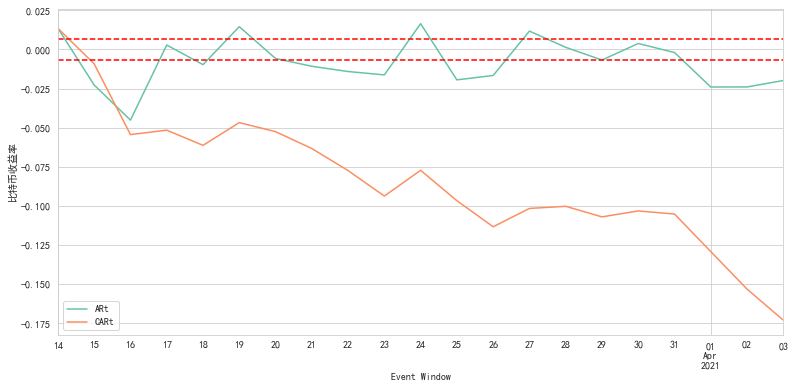

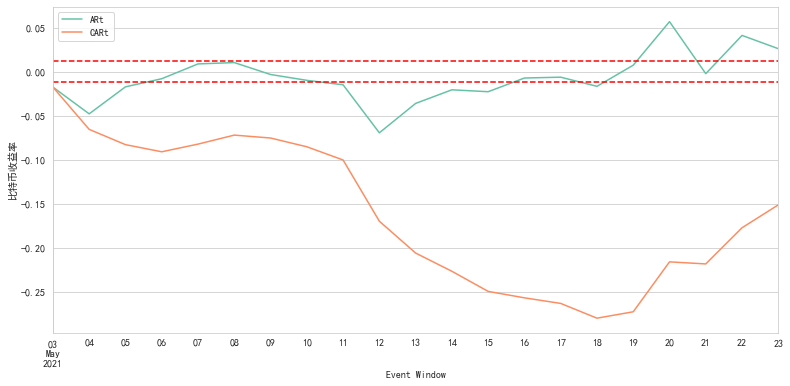

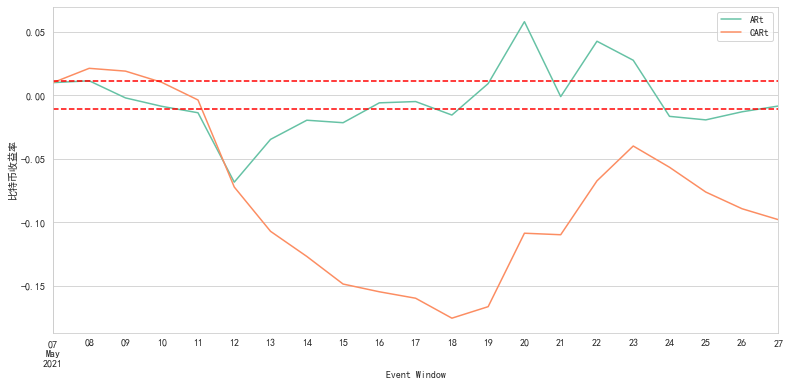

In [116]:
list(map(main, events))

In [99]:
a

,trade_date,比特币收益率,数字货币市场收益率,E(Rt),ARt,CARt
102,2021-03-14,0.025113,-0.0321,-0.004467,0.029580,0.029580
103,2021-03-15,-0.041943,-0.0221,-0.000556,-0.041387,-0.011807
104,2021-03-16,-0.049019,0.0277,0.018917,-0.067937,-0.079743
105,2021-03-17,0.027786,0.0287,0.019309,0.008477,-0.071266
106,2021-03-18,0.007648,-0.0220,-0.000517,0.008166,-0.063100
107,2021-03-19,0.015377,0.0245,0.017666,-0.002289,-0.065390
108,2021-03-20,0.017941,-0.0040,0.006521,0.011420,-0.053970
109,2021-03-21,-0.029794,0.0000,0.008086,-0.037880,-0.091850
110,2021-03-22,-0.017702,-0.0417,-0.008221,-0.009481,-0.101331
111,2021-03-23,-0.029735,-0.0011,0.007655,-0.037390,-0.138721
